In [1]:
from keras.datasets import imdb
top_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words)

Using TensorFlow backend.


17465344/17464789 [==============================] - 7s 0us/step


In [3]:
x_train[4]

[1,
 249,
 1323,
 7,
 61,
 113,
 10,
 10,
 13,
 1637,
 14,
 20,
 56,
 33,
 2401,
 18,
 457,
 88,
 13,
 2626,
 1400,
 45,
 3171,
 13,
 70,
 79,
 49,
 706,
 919,
 13,
 16,
 355,
 340,
 355,
 1696,
 96,
 143,
 4,
 22,
 32,
 289,
 7,
 61,
 369,
 71,
 2359,
 5,
 13,
 16,
 131,
 2073,
 249,
 114,
 249,
 229,
 249,
 20,
 13,
 28,
 126,
 110,
 13,
 473,
 8,
 569,
 61,
 419,
 56,
 429,
 6,
 1513,
 18,
 35,
 534,
 95,
 474,
 570,
 5,
 25,
 124,
 138,
 88,
 12,
 421,
 1543,
 52,
 725,
 6397,
 61,
 419,
 11,
 13,
 1571,
 15,
 1543,
 20,
 11,
 4,
 2,
 5,
 296,
 12,
 3524,
 5,
 15,
 421,
 128,
 74,
 233,
 334,
 207,
 126,
 224,
 12,
 562,
 298,
 2167,
 1272,
 7,
 2601,
 5,
 516,
 988,
 43,
 8,
 79,
 120,
 15,
 595,
 13,
 784,
 25,
 3171,
 18,
 165,
 170,
 143,
 19,
 14,
 5,
 7224,
 6,
 226,
 251,
 7,
 61,
 113]

Dictionary mapping words to integers

In [5]:
imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

First review(decoded)in text format: 

In [6]:
word_dict = imdb.get_word_index()
word_dict = { key:(value + 3) for key, value in word_dict.items() }
word_dict[''] = 0  # Padding
word_dict['>'] = 1 # Start
word_dict['?'] = 2 # Unknown word
reverse_word_dict = { value:key for key, value in word_dict.items() }
print(' '.join(reverse_word_dict[id] for id in x_train[0]))

> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

Uniforming the length of tensors

In [8]:
from keras.preprocessing import sequence
max_review_length = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.embeddings import Embedding
from keras.layers import Flatten

embedding_vector_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                256016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 576,305
Trainable params: 576,305
Non-trainable params: 0
_________________________________________________________________
None


Training the model

In [10]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/tensorflow/python/framework/indexed_slices.py:414: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 14s 550us/step - loss: 0.4829 - accuracy: 0.7427 - val_loss: 0.2938 - val_accuracy: 0.8751
Epoch 2/5
25000/25000 [==============================] - 12s 461us/step - loss: 0.1709 - accuracy: 0.9378 - val_loss: 0.2945 - val_accuracy: 0.8777
Epoch 3/5
25000/25000 [==============================] - 14s 543us/step - loss: 0.0493 - accuracy: 0.9880 - val_loss: 0.3617 - val_accuracy: 0.8739
Epoch 4/5
25000/25000 [==============================] - 14s 558us/step - loss: 0.0103 - accuracy: 0.9987 - val_loss: 0.4319 - val_accuracy: 0.8720
Epoch 5/5
25000/25000 [==============================] - 16s 627us/step - loss: 0.0025 - accuracy: 0.9998 - val_loss: 0.4738 - val_accuracy: 0.8710


Checking for overfitting

[]

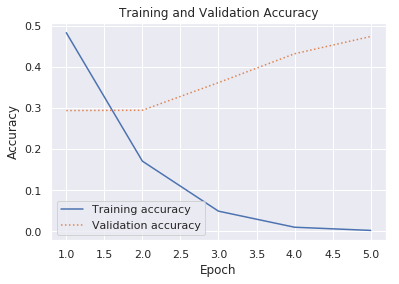

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
acc = hist.history['loss']
val = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower left')
plt.plot()

In [15]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Accuracy: 87.10%
